# A Novel Kernel-Based Approach For Uneven length Symbolic Data: A Case Study for Establishing Type 2 Diabetes Risk

## Peptide
### BOW Logistic Regression
Script used to run Logistic Regression classifier on Bag-of-Words (Binary) feature representation of the Peptide validation dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from util_log import *

In [2]:
#Load data
df_BoW = pd.read_csv(R'C:\Users\NN133\Documents\GitHub\AntiCancer_Peptides\Bin_peptide.csv', header=None)
df_BIN = pd.read_csv(R'C:\Users\NN133\Documents\GitHub\AntiCancer_Peptides\Bow_peptide.csv', header=None)

In [3]:
labelloc = R'C:\Users\NN133\Documents\GitHub\AntiCancer_Peptides\ytr.csv'
label = pd.read_csv(labelloc, header=None)

In [4]:
#Extract the labels
ytr = label.values
ytr.shape

(388, 1)

In [5]:
#Extract the Data
BoW = df_BoW.values
BIN = df_BIN.values

print(f'--> Size of BoW features --- {BoW.shape}')
print(f'--> Size of BIN features --- {BIN.shape}')

--> Size of BoW features --- (388, 22)
--> Size of BIN features --- (388, 22)


## Run LOOCV Logistic Regression on BoW

In [6]:
#Run logistic Regression
cv_Bow     = LeaveOneOut()
LR_Bow     = LogisticRegression()
scores_Bow = cross_val_score(LR_Bow, BoW, ytr, scoring='accuracy', cv=cv_Bow, n_jobs=-1)

print('--> Bag-of-Words Accuracy: %.3f (%.3f)' % (np.mean(scores_Bow), np.std(scores_Bow)))

--> Bag-of-Words Accuracy: 0.920 (0.271)


In [7]:
#Predict
Y_pred_Bow = cross_val_predict(LR_Bow, BoW, ytr, cv=cv_Bow, n_jobs=-1)

--> The total of 388 predicted with only 357 accurate predictions

Ground Truth comparison

Actual label is True while we predicted True   -  True Positive  =  179
Actual label is False while we predicted False -  True Negatve   =  178
Actual label is False while we predicted True  -  False Positive =  16
Actual label is True while we predicted False  -  False Negative =  15


--> 195 positive outcomes predicted
--> 193 negative outcomes predicted
--> An accuracy of 92.01 % was achieved
--> Sensitity of 0.92 was achieved
--> Specificity of 0.92 was achieved 
--> 0.5 rate of positive prediction
--> 0.5 rate of negative prediction
--> 0.08 false negative rate was achieved
--> 0.08 false positve rate (fallout) was achieved
--> Negative predictive value of 0.92
--> Recall value 0f 0.92 achieved
--> The precision vaue of 0.92 achieved
--> An Fscore of 0.92 achieved


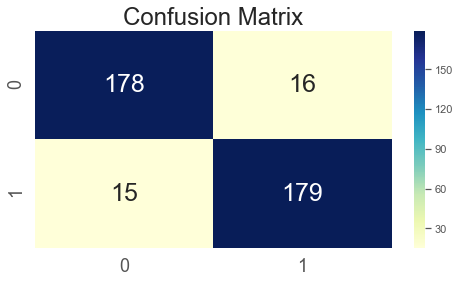

In [8]:
#Extract evaluation metric on Train set
eva_Train_Bow = EvaluateTest(Y_pred_Bow, np.squeeze(ytr))

## Run Logistic Regression on BIN

In [9]:
#Run logistic Regression
cv_BIN     = LeaveOneOut()
LR_BIN     = LogisticRegression()
scores_BIN = cross_val_score(LR_BIN, BIN, ytr, scoring='accuracy', cv=cv_BIN, n_jobs=-1)

print('--> Binary Bag-of-Words Accuracy: %.3f (%.3f)' % (np.mean(scores_BIN), np.std(scores_BIN)))

--> Binary Bag-of-Words Accuracy: 0.925 (0.263)


In [10]:
#Preditc
Y_pred_BIN = cross_val_predict(LR_BIN, BIN, ytr, cv=cv_BIN, n_jobs=-1)

--> The total of 388 predicted with only 359 accurate predictions

Ground Truth comparison

Actual label is True while we predicted True   -  True Positive  =  182
Actual label is False while we predicted False -  True Negatve   =  177
Actual label is False while we predicted True  -  False Positive =  13
Actual label is True while we predicted False  -  False Negative =  16


--> 195 positive outcomes predicted
--> 193 negative outcomes predicted
--> An accuracy of 92.53 % was achieved
--> Sensitity of 0.92 was achieved
--> Specificity of 0.93 was achieved 
--> 0.5 rate of positive prediction
--> 0.5 rate of negative prediction
--> 0.08 false negative rate was achieved
--> 0.07 false positve rate (fallout) was achieved
--> Negative predictive value of 0.92
--> Recall value 0f 0.92 achieved
--> The precision vaue of 0.93 achieved
--> An Fscore of 0.92 achieved


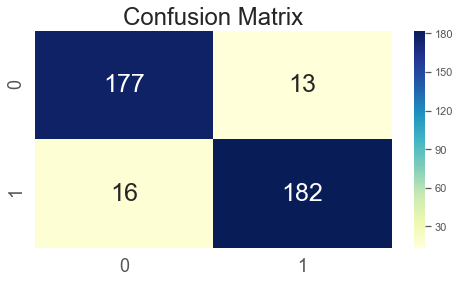

In [11]:
#Extract evaluation metric on Train set
eva_Train_BIN = EvaluateTest(Y_pred_BIN, np.squeeze(ytr))

## Extract Results

In [12]:
Tra_Bow  = list(eva_Train_Bow.values())
Tra_BIN  = list(eva_Train_BIN.values())
keysList = list(eva_Train_Bow.keys())

In [13]:
Result = pd.DataFrame(zip(Tra_Bow,Tra_BIN),index=keysList, columns=['Tra_Bow','Tra_BIN'])
Result

,Tra_Bow,Tra_BIN
Pos,195.00,195.00
Neg,193.00,193.00
Accu,92.01,92.53
Sen,0.92,0.92
Spec,0.92,0.93
RPP,0.50,0.50
RNP,0.50,0.50
Miss,0.08,0.08
Fall,0.08,0.07
NPV,0.92,0.92


In [14]:
Result.loc[['Fscore','Accu','Sen','Spec' ],:].T

,Fscore,Accu,Sen,Spec
Tra_Bow,0.92,92.01,0.92,0.92
Tra_BIN,0.92,92.53,0.92,0.93
